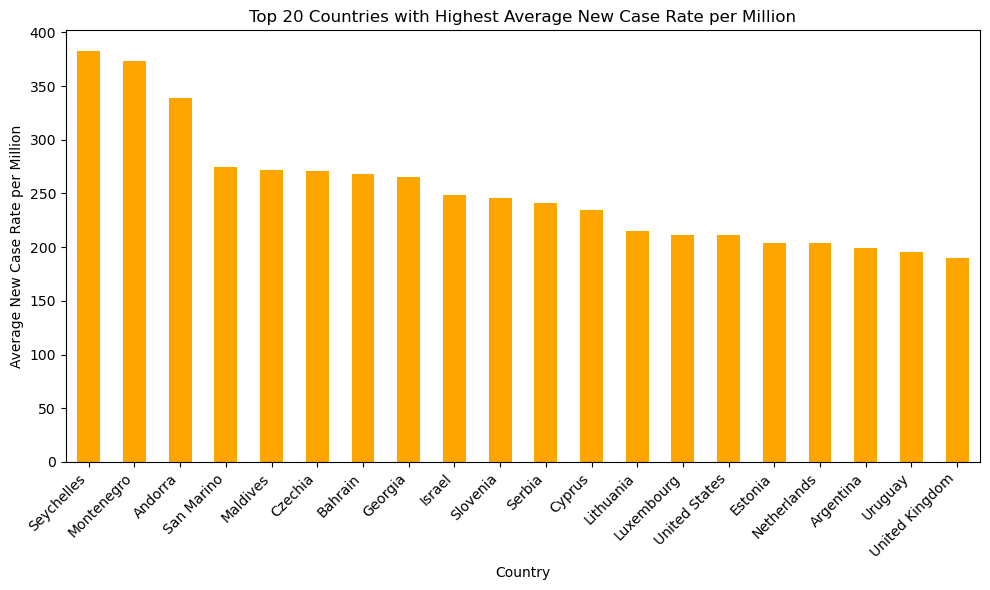

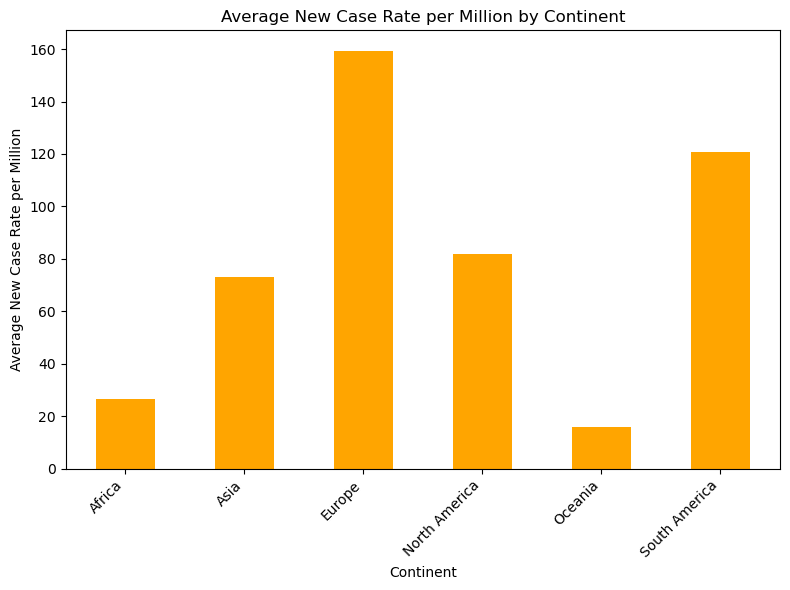

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'covid-data.csv'
data = pd.read_csv(file_path)

# Calculate 'new_cases_per_million' if it doesn't exist
if 'new_cases_per_million' not in data.columns:
    data['new_cases_per_million'] = (data['new_cases'] / data['population']) * 1e6

# Drop rows with missing values in 'new_cases_per_million'
data = data.dropna(subset=['new_cases_per_million'])

# Calculate the average new cases per million for each country over the entire dataset
country_avg_new_cases_per_million = data.groupby('location')['new_cases_per_million'].mean().nlargest(20)

# Plot the first chart: Top 20 Countries with Highest Average New Case Rate per Million
plt.figure(figsize=(10, 6))
country_avg_new_cases_per_million.plot(kind='bar', color='orange')
plt.title("Top 20 Countries with Highest Average New Case Rate per Million")
plt.xlabel("Country")
plt.ylabel("Average New Case Rate per Million")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate the average new cases per million for each continent
continent_avg_new_cases_per_million = data.groupby('continent')['new_cases_per_million'].mean()

# Plot the second chart: Average New Case Rate per Million by Continent
plt.figure(figsize=(8, 6))
continent_avg_new_cases_per_million.plot(kind='bar', color='orange')
plt.title("Average New Case Rate per Million by Continent")
plt.xlabel("Continent")
plt.ylabel("Average New Case Rate per Million")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
